Notebook to analyse the arm movements

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.image import imread
from scipy.spatial import ConvexHull


In [3]:
la_columns = ['l_shoulder_x', 'l_shoulder_y', 'l_shoulder_z', 'l_elbow_x', 'l_elbow_y', 'l_elbow_z', 'l_wrist_x', 'l_wrist_y', 'l_wrist_z']
coordinates = np.random.rand(500, 9) * 60
coordinates_df = pd.DataFrame(coordinates, columns=la_columns)

In [4]:
coordinates_df.head(5)

,l_shoulder_x,l_shoulder_y,l_shoulder_z,l_elbow_x,l_elbow_y,l_elbow_z,l_wrist_x,l_wrist_y,l_wrist_z
0,14.675102,3.546214,48.973723,1.767329,14.918216,16.449329,13.422215,47.400487,53.951420
1,13.709977,48.682700,10.350067,19.952540,28.065537,49.604779,0.887673,19.062355,19.595585
2,3.164420,54.706356,48.755407,27.197323,20.158153,53.528024,45.695313,49.780422,30.340649
3,44.952594,44.029681,25.349034,7.472580,6.964102,52.110033,49.095886,50.192964,40.969120
4,49.740717,37.363111,39.618183,16.245001,6.096100,16.086541,59.720420,9.328084,57.932883


## simple figure with scatterplot around an imported image

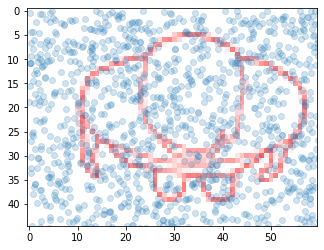

In [5]:
img = imread('human_figures.png')
plt.scatter(x=coordinates_df.loc[:, coordinates_df.columns.str.contains('x')], y=coordinates_df.loc[:, coordinates_df.columns.str.contains('y')], alpha=0.2)
plt.imshow(img[0:45, 0:60])

## simple figure with scatterplot around an image with the hull of the points drawn aswell

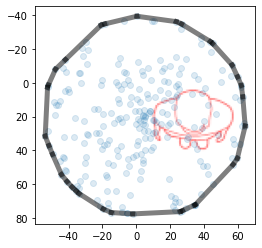

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x = coordinates_df.loc[:, coordinates_df.columns.str.contains('l_wrist_x')].values
y = coordinates_df.loc[:, coordinates_df.columns.str.contains('l_wrist_y')].values

# Generate random spherical coordinates
theta = np.random.uniform(0, 2*np.pi, 250)
phi = np.random.uniform(0, np.pi, 250)

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(phi) * np.cos(theta) * 60 + 5
y = np.sin(phi) * np.sin(theta) * 60 + 20

# Find the convex hull of the points
hull = ConvexHull(np.column_stack((x, y)))

# Plot the scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.15) # can also remove the individual datapoints so there is just an outline
ax.imshow(img[0:45, 0:60])

# Plot the outline of the convex hull
for simplex in hull.simplices:
    ax.plot(x[simplex], y[simplex], 'k-', lw=5, alpha=0.5)

# our data

/tmp/ipykernel_236/3663911658.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fri.dropna(inplace=True)
/tmp/ipykernel_236/3663911658.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x[simplex], y[simplex], 'k-', lw=5, alpha=0.5, c='r')
/tmp/ipykernel_236/3663911658.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x[simplex], y[simplex], 'k-', lw=5, alpha=0.5, c='g')


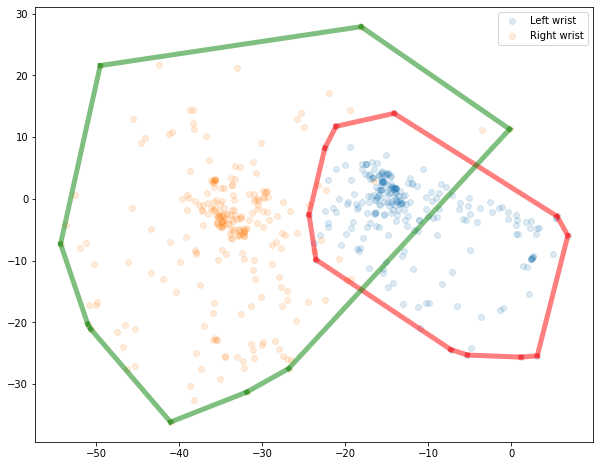

In [11]:
columns = ['UserID', 'Time', 'l_shoulder_x', 'l_shoulder_y', 'l_shoulder_z', 'l_elbow_x', 'l_elbow_y', 'l_elbow_z', 'l_wrist_x', 'l_wrist_y', 'l_wrist_z', 'r_shoulder_x', 'r_shoulder_y', 'r_shoulder_z', 'r_elbow_x', 'r_elbow_y', 'r_elbow_z', 'r_wrist_x', 'r_wrist_y', 'r_wrist_z']
df = pd.read_csv('Query_all.csv', names=columns, header=None)
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

mask = (df['Time'] > '2023-01-27 14:00:00.000')
df_fri = df.loc[mask]
df_fri.dropna(inplace=True)

x = df_fri.loc[:, df_fri.columns.str.contains('l_wrist_x')].values
y = df_fri.loc[:, df_fri.columns.str.contains('l_wrist_y')].values

hull = ConvexHull(np.column_stack((x, y)))

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, alpha=0.15, label='Left wrist') # can also remove the individual datapoints so there is just an outline

for simplex in hull.simplices:
    ax.plot(x[simplex], y[simplex], 'k-', lw=5, alpha=0.5, c='r')

x = df_fri.loc[:, df_fri.columns.str.contains('r_wrist_x')].values
y = df_fri.loc[:, df_fri.columns.str.contains('r_wrist_y')].values

hull = ConvexHull(np.column_stack((x, y)))

ax.scatter(x, y, alpha=0.15, label='Right wrist') # can also remove the individual datapoints so there is just an outline
#ax.imshow(img[0:45, 0:60])

for simplex in hull.simplices:
    ax.plot(x[simplex], y[simplex], 'k-', lw=5, alpha=0.5, c='g')

ax.legend()


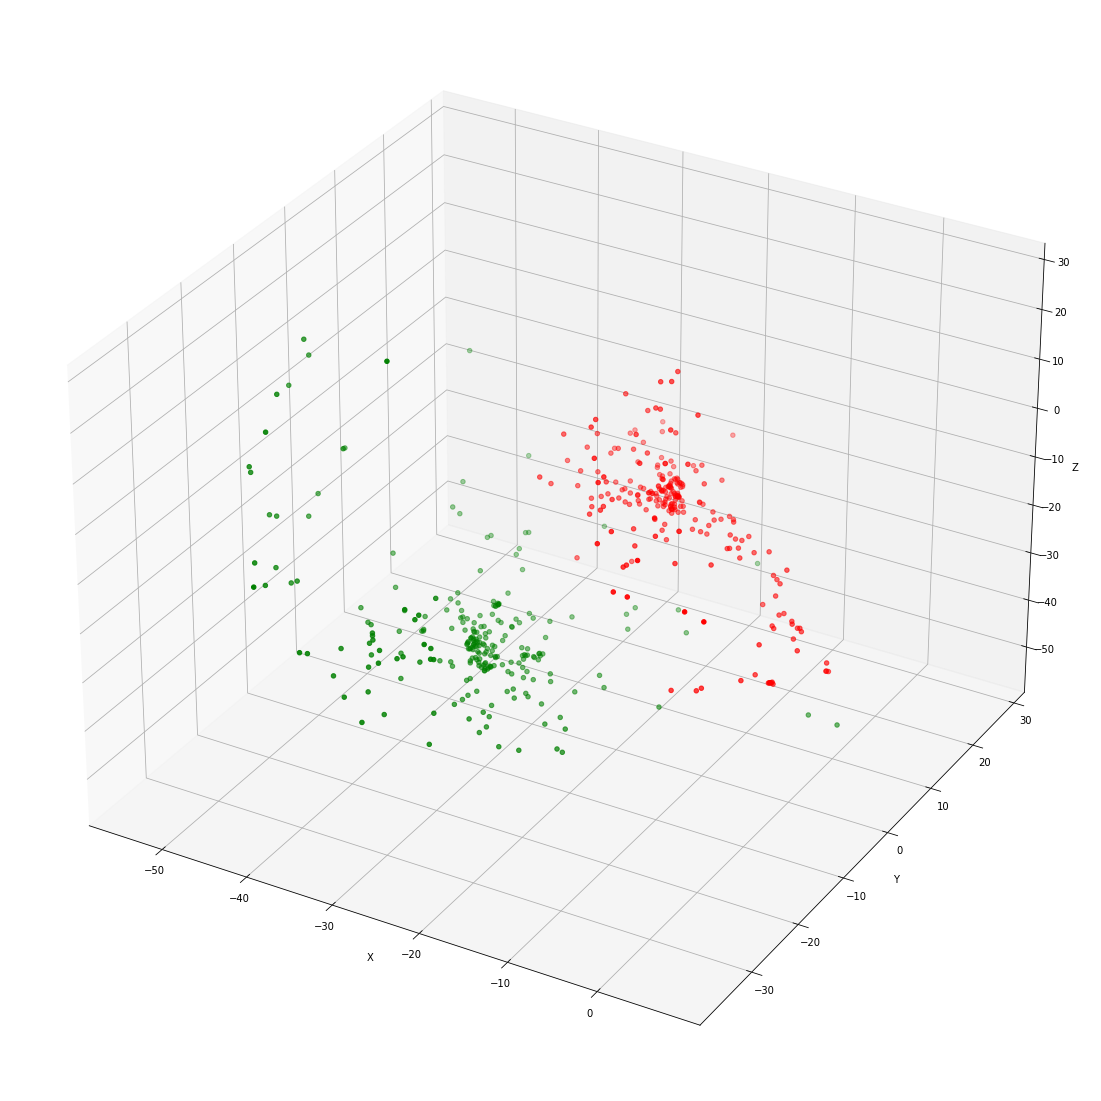

In [9]:
%matplotlib inline

x = df_fri.loc[:, df_fri.columns.str.contains('l_wrist_x')].values
y = df_fri.loc[:, df_fri.columns.str.contains('l_wrist_y')].values
z = df_fri.loc[:, df_fri.columns.str.contains('l_wrist_z')].values

x_r = df_fri.loc[:, df_fri.columns.str.contains('r_wrist_x')].values
y_r = df_fri.loc[:, df_fri.columns.str.contains('r_wrist_y')].values
z_r = df_fri.loc[:, df_fri.columns.str.contains('r_wrist_z')].values

fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r')
ax.scatter(x_r, y_r, z_r, c='g')


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [1]:
df_fri[['l_wrist_z', 'r_wrist_z']].head(50)



NameError: name 'df_fri' is not defined

In [3]:
'''
Five measurements every 3 seconds (5 users) -> 1.6667 measurements per second
Let's say on average the users use the sensor system for 2 hours daily (7200 seconds)
7200x1.6666 = 12.000 measurements per day -> 120000x20 (20 features because 18 coordinates and hubid and time)
This is roughly 2MB of data per day 
We have a server of about 16GB -> can store 8192 days of data in that.
'''


In [9]:
import numpy as np
import sys
daily_file = np.random.rand(12000, 20)
sys.getsizeof(daily_file) / (1024*1024)


1.8311767578125

In [ ]:
### code for calculating variables graphical representations ##
